In [2]:
#There are sales figures based on TV, Radio and Newspaper advertisements.
#From here Sales Column is the target i.e. y=df['Sales'].
#We will look for an answer to the question of how much my sales figures will increase if we invest separately in TV, radio and newspaper,
#and we will find out which advertising method is more successful.
#We will visualize the data we have allocated as testing and
#the data we predicted in the same graph with a line chart.

In [ ]:
#Q1) Which method is more usefull in advertising
#Q2) How much my sales figures will increase if I invest separately in TV, radio and newspaper
#Q3) Visualize the data you have allocated as testing and the data you predicted in the same graph with a line chart.

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import datetime
pd.set_option("display.max_columns",55)
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np

In [8]:
df=pd.read_csv("advertising.csv")

In [10]:
#Eda

In [12]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [14]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [18]:
df.corr(numeric_only=True)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [20]:
df.shape

(200, 4)

<Axes: >

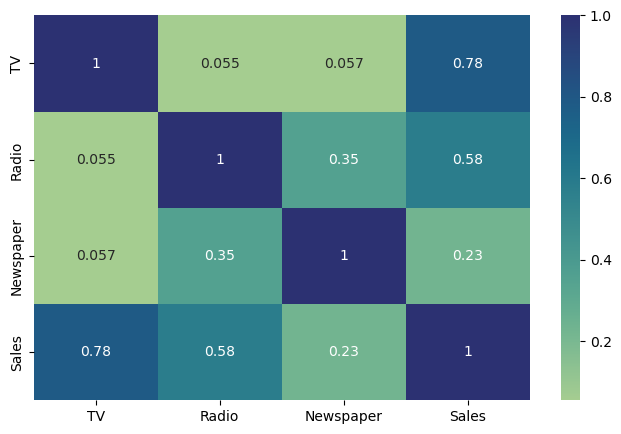

In [32]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="crest")

In [36]:
abs(df.corr(numeric_only=True)["Sales"]).sort_values(ascending=False)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

In [38]:
#A1) Tv has most effect on advertisement

In [40]:
#Data visuluation

<Axes: xlabel='TV', ylabel='Density'>

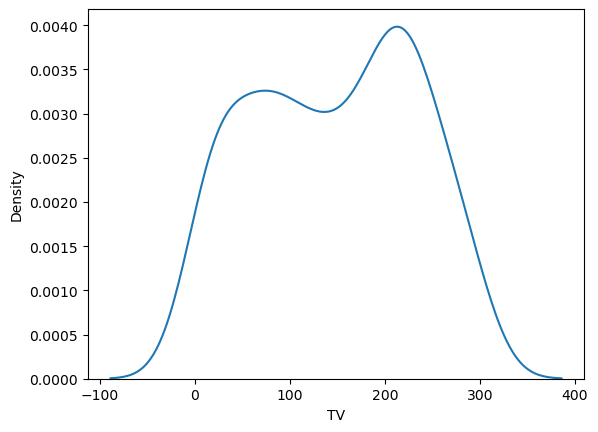

In [48]:
sns.kdeplot(x=df["TV"])

<Axes: xlabel='Radio', ylabel='Density'>

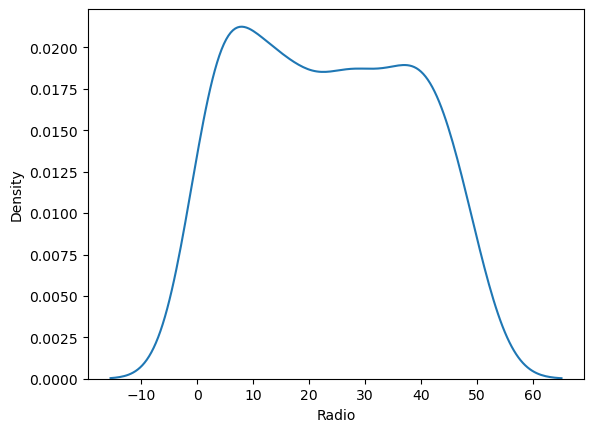

In [50]:
sns.kdeplot(x=df["Radio"])

<Axes: xlabel='Newspaper', ylabel='Density'>

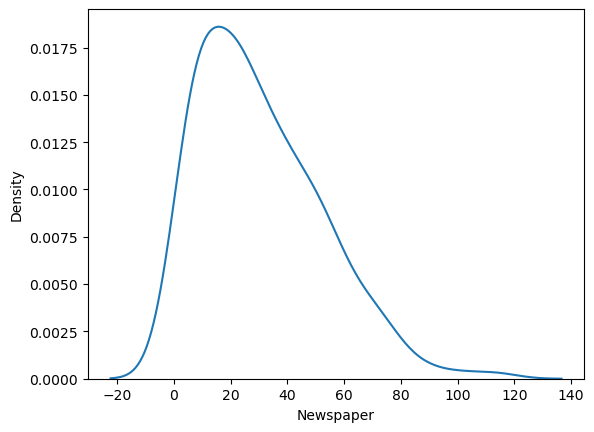

In [56]:
sns.kdeplot(x=df["Newspaper"])

<Axes: xlabel='Newspaper'>

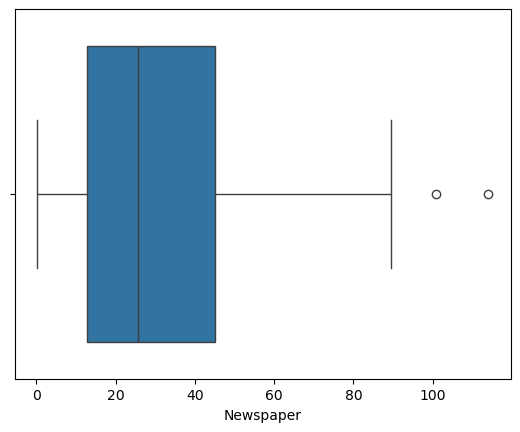

In [54]:
sns.boxplot(x=df["Newspaper"])

In [58]:
#outliers

In [60]:
outliers=df.quantile(q=0.97, numeric_only=True)

In [62]:
df=df[(df["Newspaper"]<outliers["Newspaper"])]

In [76]:
x=df.drop(["Sales"], axis=1)
y=df[["Sales"]]

In [64]:
#Modelling

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [80]:
lr=LinearRegression()

In [84]:
lr.fit(x_train,y_train)

LinearRegression()

In [86]:
pred=lr.predict(x_test)

In [96]:
feature_importance=pd.DataFrame({"Feature": x_train.columns,"Coefs":lr.coef_[0]})

In [98]:
feature_importance

,Feature,Coefs
0,TV,0.045640
1,Radio,0.176483
2,Newspaper,0.005115


In [100]:
#A2)Coefficients table shows the estimated impact on sales of a one unit increase in TV, radio and newspaper advertising expenditures

In [102]:
r2_score(y_test,pred)**.5

0.9484336336802333

In [104]:
mean_squared_error(y_test,pred)**.5

1.6931269371410205

In [106]:
#The values are  very good r2score is above 80%

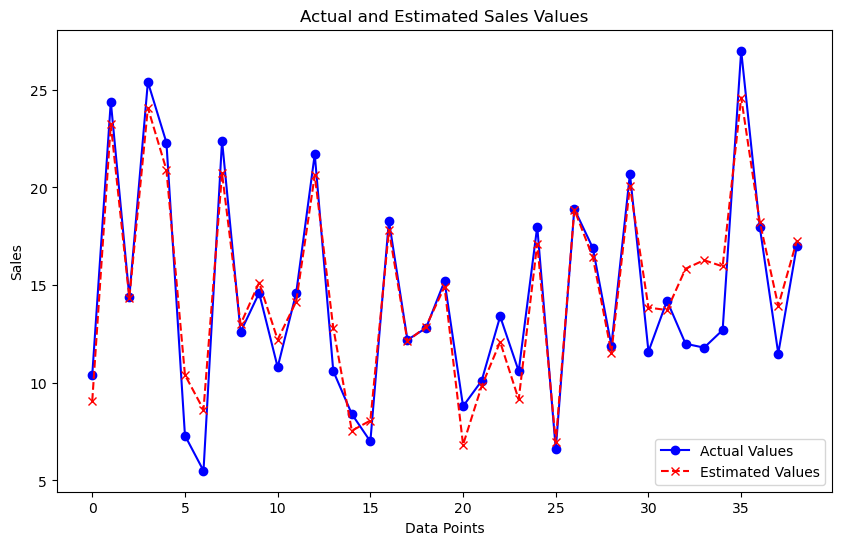

In [110]:
plt.figure(figsize=(10, 6))

# Let's plot actual and estimated sales values
plt.plot(y_test.values, label='Actual Values', color='blue', linestyle='-', marker='o')
plt.plot(pred, label='Estimated Values', color='red', linestyle='--', marker='x')

plt.title("Actual and Estimated Sales Values")
plt.xlabel("Data Points")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [112]:
#A3)
#In this chart:
#The blue line shows the actual sales values in the test data.
#The red line shows the model's predicted sales values.
#With these codes, you can see the impact of a one-unit increase
#in TV, radio and newspaper spending on sales,
#understand which advertising channel is more effective and 
#visualize the accuracy of the model in the test data.

In [114]:
residuals=pred-y_test

<Axes: xlabel='Sales', ylabel='Density'>

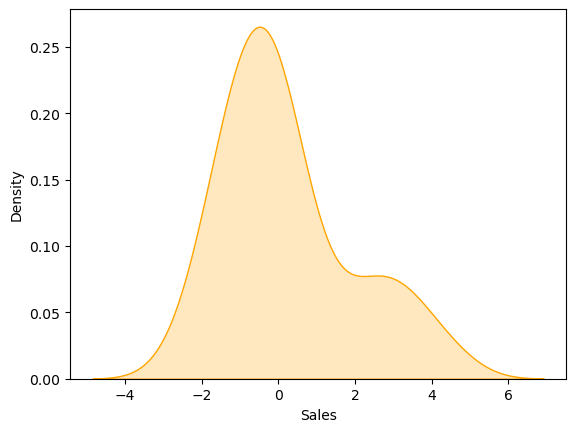

In [126]:
sns.kdeplot(x=residuals["Sales"], color="orange", fill=True)

In [128]:
#We can say that it follows normalization